In [1]:
def simpleMul(X, Y):
    return [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]

### The Strassen algorithm

In [29]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
from math import ceil, log
g = 0

def ikjMatrixProduct(A, B):
    n = len(A)
    C = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for k in range(n):
            for j in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

def add(A, B):
    n = len(A)
    C = [[0 for j in range(0, n)] for i in range(0, n)]
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] + B[i][j]
    return C

def subtract(A, B):
    n = len(A)
    C = [[0 for j in range(0, n)] for i in range(0, n)]
    for i in range(0, n):
        for j in range(0, n):
            C[i][j] = A[i][j] - B[i][j]
    return C

def strassenR(A, B):
    """ 
        Implementation of the strassen algorithm.
    """
    n = len(A)

    if n <= 10:
        return ikjMatrixProduct(A, B)
    else:
        # initializing the new sub-matrices
        newSize = int(n/2)
        a11 = [[0 for j in range(0, newSize)] for i in range(0, newSize)]
        a12 = [[0 for j in range(0, newSize)] for i in range(0, newSize)]
        a21 = [[0 for j in range(0, newSize)] for i in range(0, newSize)]
        a22 = [[0 for j in range(0, newSize)] for i in range(0, newSize)]

        b11 = [[0 for j in range(0, newSize)] for i in range(0, newSize)]
        b12 = [[0 for j in range(0, newSize)] for i in range(0, newSize)]
        b21 = [[0 for j in range(0, newSize)] for i in range(0, newSize)]
        b22 = [[0 for j in range(0, newSize)] for i in range(0, newSize)]

        aResult = [[0 for j in range(0, newSize)] for i in range(0, newSize)]
        bResult = [[0 for j in range(0, newSize)] for i in range(0, newSize)]

        # dividing the matrices in 4 sub-matrices:
        for i in range(0, newSize):
            for j in range(0, newSize):
                a11[i][j] = A[i][j]            # top left
                a12[i][j] = A[i][j + newSize]    # top right
                a21[i][j] = A[i + newSize][j]    # bottom left
                a22[i][j] = A[i + newSize][j + newSize] # bottom right

                b11[i][j] = B[i][j]            # top left
                b12[i][j] = B[i][j + newSize]    # top right
                b21[i][j] = B[i + newSize][j]    # bottom left
                b22[i][j] = B[i + newSize][j + newSize] # bottom right

        # Calculating p1 to p7:
        aResult = add(a11, a22)
        bResult = add(b11, b22)
        p1 = strassenR(aResult, bResult) # p1 = (a11+a22) * (b11+b22)

        aResult = add(a21, a22)      # a21 + a22
        p2 = strassenR(aResult, b11)  # p2 = (a21+a22) * (b11)

        bResult = subtract(b12, b22) # b12 - b22
        p3 = strassenR(a11, bResult)  # p3 = (a11) * (b12 - b22)

        bResult = subtract(b21, b11) # b21 - b11
        p4 =strassenR(a22, bResult)   # p4 = (a22) * (b21 - b11)

        aResult = add(a11, a12)      # a11 + a12
        p5 = strassenR(aResult, b22)  # p5 = (a11+a12) * (b22)   

        aResult = subtract(a21, a11) # a21 - a11
        bResult = add(b11, b12)      # b11 + b12
        p6 = strassenR(aResult, bResult) # p6 = (a21-a11) * (b11+b12)

        aResult = subtract(a12, a22) # a12 - a22
        bResult = add(b21, b22)      # b21 + b22
        p7 = strassenR(aResult, bResult) # p7 = (a12-a22) * (b21+b22)

        # calculating c21, c21, c11 e c22:
        c12 = add(p3, p5) # c12 = p3 + p5
        c21 = add(p2, p4)  # c21 = p2 + p4

        aResult = add(p1, p4) # p1 + p4
        bResult = add(aResult, p7) # p1 + p4 + p7
        c11 = subtract(bResult, p5) # c11 = p1 + p4 - p5 + p7

        aResult = add(p1, p3) # p1 + p3
        bResult = add(aResult, p6) # p1 + p3 + p6
        c22 = subtract(bResult, p2) # c22 = p1 + p3 - p2 + p6

        # Grouping the results obtained in a single matrix:
        C = [[0 for j in range(0, n)] for i in range(0, n)]
        for i in range(0, newSize):
            for j in range(0, newSize):
                C[i][j] = c11[i][j]
                C[i][j + newSize] = c12[i][j]
                C[i + newSize][j] = c21[i][j]
                C[i + newSize][j + newSize] = c22[i][j]
        return C

def strassen(A, B):
    assert type(A) == list and type(B) == list
    assert len(A) == len(A[0]) == len(B) == len(B[0])

    # Make the matrices bigger so that you can apply the strassen
    # algorithm recursively without having to deal with odd
    # matrix sizes
    nextPowerOfTwo = lambda n: 2**int(ceil(log(n,2)))
    n = len(A)
    m = nextPowerOfTwo(n)
    APrep = [[0 for i in range(m)] for j in range(m)]
    BPrep = [[0 for i in range(m)] for j in range(m)]
    for i in range(n):
        for j in range(n):
            APrep[i][j] = A[i][j]
            BPrep[i][j] = B[i][j]
    CPrep = strassenR(APrep, BPrep)
    C = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            C[i][j] = CPrep[i][j]
    return C

In [10]:
import numpy
import time

genM = lambda x=3 : numpy.random.random_integers(0, 1000, (x, x))
genM()

def mulHelper(X, Y, mul = simpleMul, toStore=False):
    strt = time.time()
    result = mul(X,Y)
    srt_time = time.time() - strt
    print("Time elapsed for %s on %s =  %s" % (mul.__name__, len(X), srt_time))
    if toStore:
        if len(result) > 10:
            with open(mul.__name__ + ".txt", 'w') as f:
                f.write(str(result))
        else:
            for r in result:
                print(r)
    return srt_time

/Users/ildarnurgaliev/.conda/envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead


In [31]:
dim = 100
X, Y = genM(dim), genM(dim)

mulHelper(X, Y, ikjMatrixProduct)

print("--------------")

mulHelper(X, Y, strassenR)

/Users/ildarnurgaliev/.conda/envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead


Time elapsed for ikjMatrixProduct on 100 =  0.7610208988189697
--------------
Time elapsed for strassenR on 100 =  0.5434401035308838


0.5434401035308838

In [32]:
ns = list(range(50, 200, 50))
qs = []
rqs = []
for dim in ns:
    X, Y = genM(dim), genM(dim)
    qs.append(mulHelper(X, Y, ikjMatrixProduct))
    rqs.append(mulHelper(X, Y, strassenR))

/Users/ildarnurgaliev/.conda/envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead


Time elapsed for ikjMatrixProduct on 50 =  0.11911201477050781
Time elapsed for strassenR on 50 =  0.0746910572052002
Time elapsed for ikjMatrixProduct on 100 =  0.7573070526123047
Time elapsed for strassenR on 100 =  0.8185701370239258
Time elapsed for ikjMatrixProduct on 150 =  2.4078729152679443
Time elapsed for strassenR on 150 =  1.2996268272399902


/Users/ildarnurgaliev/.conda/envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead


Time elapsed for ikjMatrixProduct on 50 =  0.11258697509765625
Time elapsed for strassenR on 50 =  0.06895017623901367
Time elapsed for ikjMatrixProduct on 100 =  0.7541179656982422
Time elapsed for strassenR on 100 =  0.5878667831420898
Time elapsed for ikjMatrixProduct on 150 =  2.4289119243621826
Time elapsed for strassenR on 150 =  1.2854771614074707
Time elapsed for ikjMatrixProduct on 200 =  6.750266075134277
Time elapsed for strassenR on 200 =  4.413110971450806
Time elapsed for ikjMatrixProduct on 300 =  19.14085078239441
Time elapsed for strassenR on 300 =  8.699696063995361
Time elapsed for ikjMatrixProduct on 400 =  51.1258819103241
Time elapsed for strassenR on 400 =  26.485805988311768


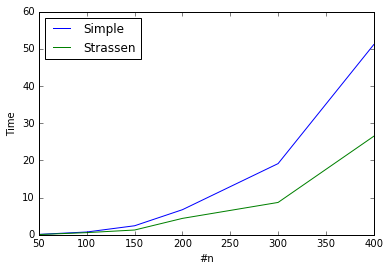

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt


def plot_performace():
    
    ns = list(range(50, 201, 50)) + list(range(300, 401, 100))
    qs = []
    rqs = []
    for dim in ns:
        X, Y = genM(dim), genM(dim)
        qs.append(mulHelper(X, Y, ikjMatrixProduct))
        rqs.append(mulHelper(X, Y, strassenR))

    plt.plot(ns, qs, label = "Simple")
    plt.plot(ns, rqs, label = "Strassen")

    plt.legend( loc='upper left')
    plt.ylabel('Time')
    plt.xlabel('#n')
    
    plt.show()
    
plot_performace()

In [27]:
%%bash
ls

hw3.ipynb
ikjMatrixProduct.txt
report hw2 Ildar Nurgaliev.docx
simpleMul.txt


In [34]:
%%bash
head simpleMul.txt

[[20303169, 23314288, 24985892, 22092695, 22272959, 22853606, 23596786, 23794094, 20491509, 22180945, 24089861, 25361919, 23681703, 23739258, 23509068, 22434982, 22246753, 25170514, 21898728, 23624935, 26948848, 24020428, 22365835, 20974739, 23624489, 21294591, 21760338, 25214214, 22938897, 20093814, 20113953, 24255367, 19638370, 23293815, 23241306, 23810186, 21772345, 21743695, 24780152, 22177945, 22107213, 24212359, 22192106, 20628555, 23583190, 23974489, 23470569, 22850643, 21748022, 21455605, 22305930, 24367823, 22934072, 22032658, 19110467, 22709937, 23396221, 21369716, 23894855, 23118745, 21775717, 21711282, 23779372, 22058463, 24163029, 23109635, 22142718, 22307748, 23865239, 20860934, 20783242, 22079863, 27611875, 23113358, 21798460, 20553650, 24138300, 22807983, 24142356, 22758114, 22309354, 24857898, 22689949, 21157319, 21383344, 22113702, 26711474, 23688206, 23460083, 23169366, 19275855, 22881000, 22733020, 22087802, 22939093, 24439825, 20121186, 21980890, 21720141, 23625982

In [35]:
%%bash
head ikjMatrixProduct.txt

[[20303169, 23314288, 24985892, 22092695, 22272959, 22853606, 23596786, 23794094, 20491509, 22180945, 24089861, 25361919, 23681703, 23739258, 23509068, 22434982, 22246753, 25170514, 21898728, 23624935, 26948848, 24020428, 22365835, 20974739, 23624489, 21294591, 21760338, 25214214, 22938897, 20093814, 20113953, 24255367, 19638370, 23293815, 23241306, 23810186, 21772345, 21743695, 24780152, 22177945, 22107213, 24212359, 22192106, 20628555, 23583190, 23974489, 23470569, 22850643, 21748022, 21455605, 22305930, 24367823, 22934072, 22032658, 19110467, 22709937, 23396221, 21369716, 23894855, 23118745, 21775717, 21711282, 23779372, 22058463, 24163029, 23109635, 22142718, 22307748, 23865239, 20860934, 20783242, 22079863, 27611875, 23113358, 21798460, 20553650, 24138300, 22807983, 24142356, 22758114, 22309354, 24857898, 22689949, 21157319, 21383344, 22113702, 26711474, 23688206, 23460083, 23169366, 19275855, 22881000, 22733020, 22087802, 22939093, 24439825, 20121186, 21980890, 21720141, 23625982